Task 1 - Data Analysis and Preprocessing

In [110]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../scripts'))

from data_loading import load_data
from data_cleaning import handle_missing_values, drop_duplicates, convert_to_datetime
from eda import plot_histogram, plot_count, plot_boxplot
from feature_engineering import create_transaction_frequency, extract_time_features
from scaling_encoding import scale_column, encode_labels
from geolocation import merge_ip_country
from utils import save_data

In [111]:
df_creditcard = load_data('../data/creditcard.csv')

In [112]:
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [113]:
df_fraud_data = load_data('../data/Fraud_Data.csv')

In [115]:
df_fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [116]:
df_IpAddress = load_data('../data/IpAddress_to_Country.csv')

In [117]:
df_IpAddress.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [118]:
df_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [119]:
df_creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [95]:
df_IpAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [96]:
df_IpAddress.columns

Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')

In [97]:
df_fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [120]:
df_fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [121]:
df_fraud_data = convert_to_datetime(df_fraud_data, ['signup_time', 'purchase_time'])

Step 1: Handle Missing Values

In [99]:
df_IpAddress = drop_duplicates(df_IpAddress)

In [100]:
df_fraud_data = handle_missing_values(df_fraud_data)

In [101]:
df_fraud_data = drop_duplicates(df_fraud_data)

Step 2: Data Cleaning

In [102]:
df_creditcard = drop_duplicates(df_creditcard)

Step 3: Exploratory Data Analysis (EDA)

Univariate Analysis

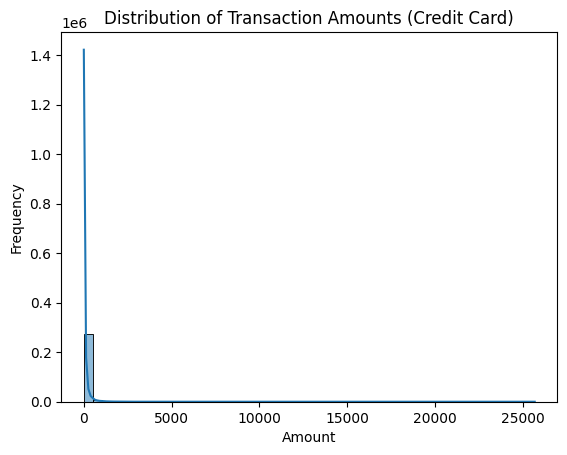

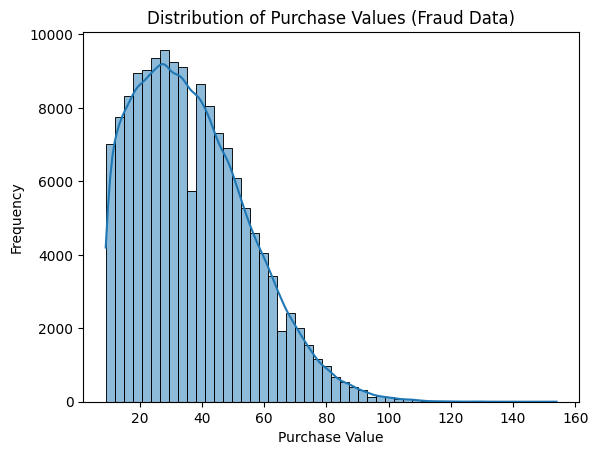

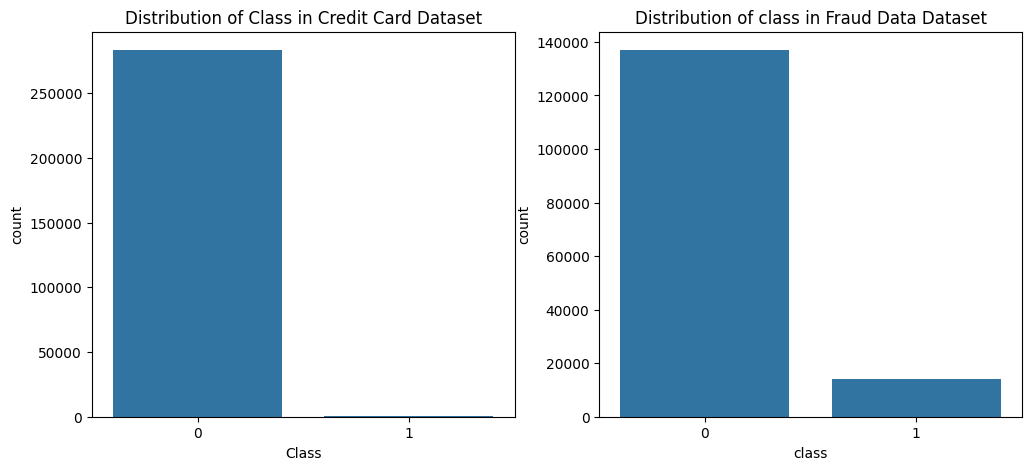

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_creditcard['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts (Credit Card)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df_fraud_data['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Values (Fraud Data)')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Class', data=df_creditcard, ax=ax[0])
ax[0].set_title('Distribution of Class in Credit Card Dataset')
sns.countplot(x='class', data=df_fraud_data, ax=ax[1])
ax[1].set_title('Distribution of class in Fraud Data Dataset')
plt.show()

In [29]:
print("Credit Card Dataset Analysis:")
print("\nAmount Column Statistics:")
print(df_creditcard['Amount'].describe())

print("\nClass Column Statistics:")
print(df_creditcard['Class'].value_counts(normalize=True))

Credit Card Dataset Analysis:

Amount Column Statistics:
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

Class Column Statistics:
Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [30]:
print("\n\nFraud Data Dataset Analysis:")
print("\npurchase_value Column Statistics:")
print(df_fraud_data['purchase_value'].describe())

print("\nclass Column Statistics:")
print(df_fraud_data['class'].value_counts(normalize=True))

print("\nAdditional Metrics:")
print(f"\nCredit Card Mean Amount: ${df_creditcard['Amount'].mean():.2f}")
print(f"Fraud Data Mean Purchase Value: ${df_fraud_data['purchase_value'].mean():.2f}")

print("\nSkewness and Kurtosis:")
print(f"Credit Card Amount Skewness: {df_creditcard['Amount'].skew():.2f}")
print(f"Fraud Data purchase_value Skurtosis: {df_fraud_data['purchase_value'].kurtosis():.2f}")

print("\nInterquartile Range:")
print(f"Credit Card Amount IQR: {df_creditcard['Amount'].quantile(0.75) - df_creditcard['Amount'].quantile(0.25):.2f}")
print(f"Fraud Data purchase_value IQR: {df_fraud_data['purchase_value'].quantile(0.75) - df_fraud_data['purchase_value'].quantile(0.25):.2f}")



Fraud Data Dataset Analysis:

purchase_value Column Statistics:
count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64

class Column Statistics:
class
0    0.906354
1    0.093646
Name: proportion, dtype: float64

Additional Metrics:

Credit Card Mean Amount: $88.47
Fraud Data Mean Purchase Value: $36.94

Skewness and Kurtosis:
Credit Card Amount Skewness: 16.98
Fraud Data purchase_value Skurtosis: 0.14

Interquartile Range:
Credit Card Amount IQR: 71.91
Fraud Data purchase_value IQR: 27.00


3.2: Bivariate Analysis

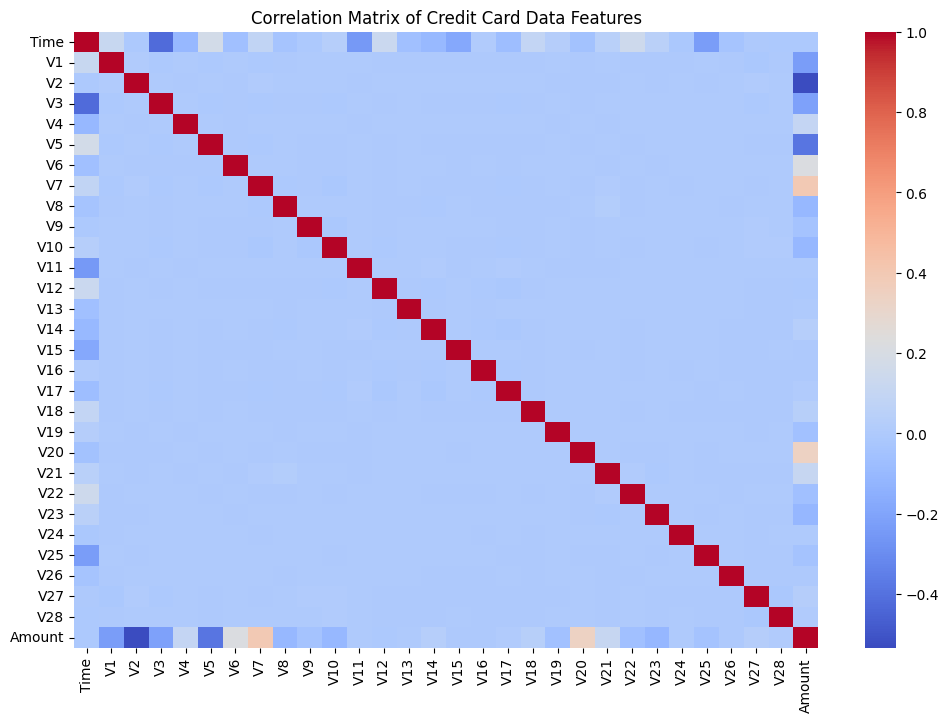

In [31]:
corr_matrix = df_creditcard.drop(columns=['Class']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Credit Card Data Features')
plt.show()

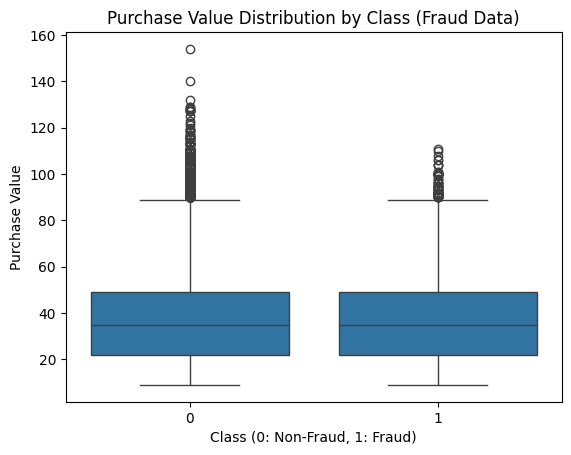

In [32]:
sns.boxplot(x='class', y='purchase_value', data=df_fraud_data)
plt.title('Purchase Value Distribution by Class (Fraud Data)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Purchase Value')
plt.show()

In [33]:
corr_matrix = df_creditcard.drop(columns=['Class']).corr()

correlation_table = pd.DataFrame(corr_matrix.T).T
v1_v28_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 
                  'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
v1_v28_amount_columns = v1_v28_columns + ['Amount']

corr_matrix = df_creditcard[v1_v28_amount_columns].corr()

In [34]:
for col in corr_matrix.columns:
    print(f"\nTop 5 Correlations for {col}:")
    print(correlation_table[col].sort_values(ascending=False)[:5])


Top 5 Correlations for V1:
V1      1.000000
Time    0.117927
V2      0.006875
V21     0.002818
V4      0.002257
Name: V1, dtype: float64

Top 5 Correlations for V2:
V2     1.000000
V27    0.007555
V7     0.007425
V1     0.006875
V3     0.005278
Name: V2, dtype: float64

Top 5 Correlations for V3:
V3     1.000000
V2     0.005278
V21    0.003500
V4     0.002829
V11    0.002339
Name: V3, dtype: float64

Top 5 Correlations for V4:
V4        1.000000
Amount    0.099514
V7        0.004657
V17       0.003655
V12       0.003366
Name: V4, dtype: float64

Top 5 Correlations for V5:
V5      1.000000
Time    0.173223
V2      0.005210
V4      0.001744
V21     0.001622
Name: V5, dtype: float64

Top 5 Correlations for V6:
V6        1.000000
Amount    0.216389
V8        0.003036
V24       0.001202
V22       0.001104
Name: V6, dtype: float64

Top 5 Correlations for V7:
V7        1.000000
Amount    0.400408
Time      0.085335
V21       0.009010
V2        0.007425
Name: V7, dtype: float64

Top 5 Correla

In [35]:
mean_purchase_by_class = df_fraud_data.groupby('class')['purchase_value'].mean().sort_values(ascending=False)

print("Mean Purchase Value by Class:")
print(mean_purchase_by_class)

Mean Purchase Value by Class:
class
1    36.993004
0    36.929418
Name: purchase_value, dtype: float64


In [36]:
median_purchase_by_class = df_fraud_data.groupby('class')['purchase_value'].median().sort_values(ascending=False)

print("\nMedian Purchase Value by Class:")
print(median_purchase_by_class)

std_purchase_by_class = df_fraud_data.groupby('class')['purchase_value'].std().sort_values(ascending=False)

print("\nStandard Deviation of Purchase Value by Class:")
print(std_purchase_by_class)


Median Purchase Value by Class:
class
0    35.0
1    35.0
Name: purchase_value, dtype: float64

Standard Deviation of Purchase Value by Class:
class
1    18.397654
0    18.315064
Name: purchase_value, dtype: float64


In [37]:
skewness_purchase_by_class = df_fraud_data.groupby('class')['purchase_value'].skew().sort_values(ascending=False)

print("\nSkewness of Purchase Value by Class:")
print(skewness_purchase_by_class)


Skewness of Purchase Value by Class:
class
0    0.675941
1    0.618350
Name: purchase_value, dtype: float64


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

kurtosis_purchase_by_class = df_fraud_data.groupby('class')['purchase_value'].apply(lambda x: pd.Series.kurt(x)).reset_index()

print("\nKurtosis of Purchase Value by Class:")
print(kurtosis_purchase_by_class)



Kurtosis of Purchase Value by Class:
   class  purchase_value
0      0        0.160661
1      1       -0.073587


Step 4: Merge Datasets for Geolocation Analysis

In [39]:
df_fraud = pd.read_csv('../data/Fraud_Data.csv')
df_ip = pd.read_csv('../data/IpAddress_to_Country.csv')

In [40]:
df_fraud.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [41]:
df_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [122]:
merged_data = merge_ip_country(df_fraud_data, df_IpAddress)

In [123]:
save_data(merged_data, '../data/merged_result.csv')
print("Merged data saved as 'merged_result.csv'.")

Merged data saved as 'merged_result.csv'.


In [124]:
df_merged = pd.read_csv('../data/merged_result.csv')

In [133]:
df_merged = convert_to_datetime(df_merged, ['signup_time', 'purchase_time'])

Step 5: Feature Engineering

In [131]:
df_merged = create_transaction_frequency(df_merged, 'user_id')

In [134]:
df_merged = extract_time_features(df_merged, 'purchase_time')
print(df_merged[['transaction_frequency', 'hour_of_day', 'day_of_week']].head())

   transaction_frequency  hour_of_day  day_of_week
0                      1           10            6
1                      1           17            4
2                      1            8            1
3                      1           21            3
4                      1            7            6


Step 6: Normalization and Scaling

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_creditcard['scaled_amount'] = scaler.fit_transform(df_creditcard[['Amount']])
df_merged['scaled_purchase_value'] = scaler.fit_transform(df_merged[['purchase_value']])

print(df_creditcard[['Amount', 'scaled_amount']].head())
print(df_merged[['purchase_value', 'scaled_purchase_value']].head())


   Amount  scaled_amount
0  149.62       0.244964
1    2.69      -0.342475
2  378.66       1.160686
3  123.50       0.140534
4   69.99      -0.073403
   purchase_value  scaled_purchase_value
0              46               0.494721
1              33              -0.214781
2              33              -0.214781
3              33              -0.214781
4              55               0.985915


Step 7: Encode Categorical Features

In [163]:
df_merged.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'class', 'country',
       'lower_bound_ip_address', 'upper_bound_ip_address',
       'transaction_frequency', 'hour_of_day', 'day_of_week',
       'scaled_purchase_value', 'source_encoded', 'browser_encoded',
       'sex_encoded'],
      dtype='object')

In [168]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_merged['source_encoded'] = le.fit_transform(df_merged['source'])
df_merged['browser_encoded'] = le.fit_transform(df_merged['browser'])
df_merged['sex_encoded'] = le.fit_transform(df_merged['sex'])
df_merged['country_encoded'] = le.fit_transform(df_merged['country'])

print(df_merged[['source', 'source_encoded', 'browser', 'browser_encoded', 'sex', 'sex_encoded', 'country_encoded', 'country']].head())

     source  source_encoded browser  browser_encoded sex  sex_encoded  \
634     SEO               2  Safari                4   F            0   
635     SEO               2  Chrome                0   F            0   
636     Ads               0      IE                2   M            1   
637  Direct               1  Chrome                0   F            0   
638     SEO               2  Chrome                0   F            0   

     country_encoded    country  
634                7  Australia  
635              162   Thailand  
636               36      China  
637               36      China  
638              162   Thailand  


C:\Users\USER\AppData\Local\Temp\ipykernel_13620\1802664234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['source_encoded'] = le.fit_transform(df_merged['source'])
C:\Users\USER\AppData\Local\Temp\ipykernel_13620\1802664234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['browser_encoded'] = le.fit_transform(df_merged['browser'])
C:\Users\USER\AppData\Local\Temp\ipykernel_13620\1802664234.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Step 8: Geographical Analysis

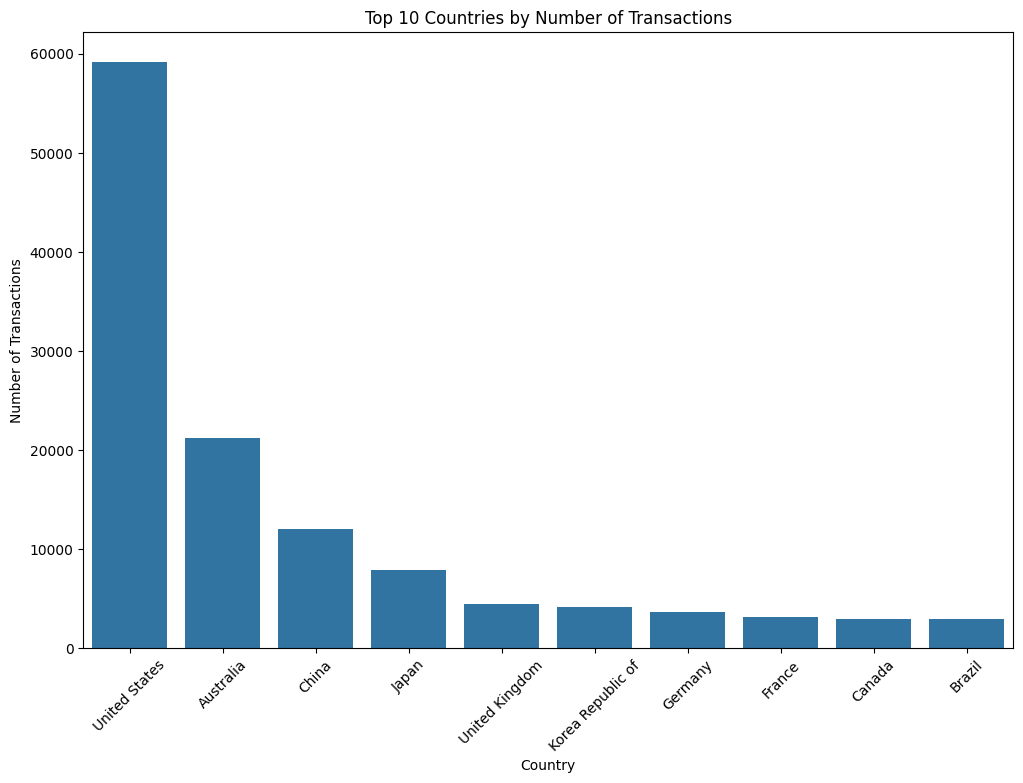

In [169]:
country_counts = df_merged['country'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=country_counts[:10].index, y=country_counts[:10].values)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()

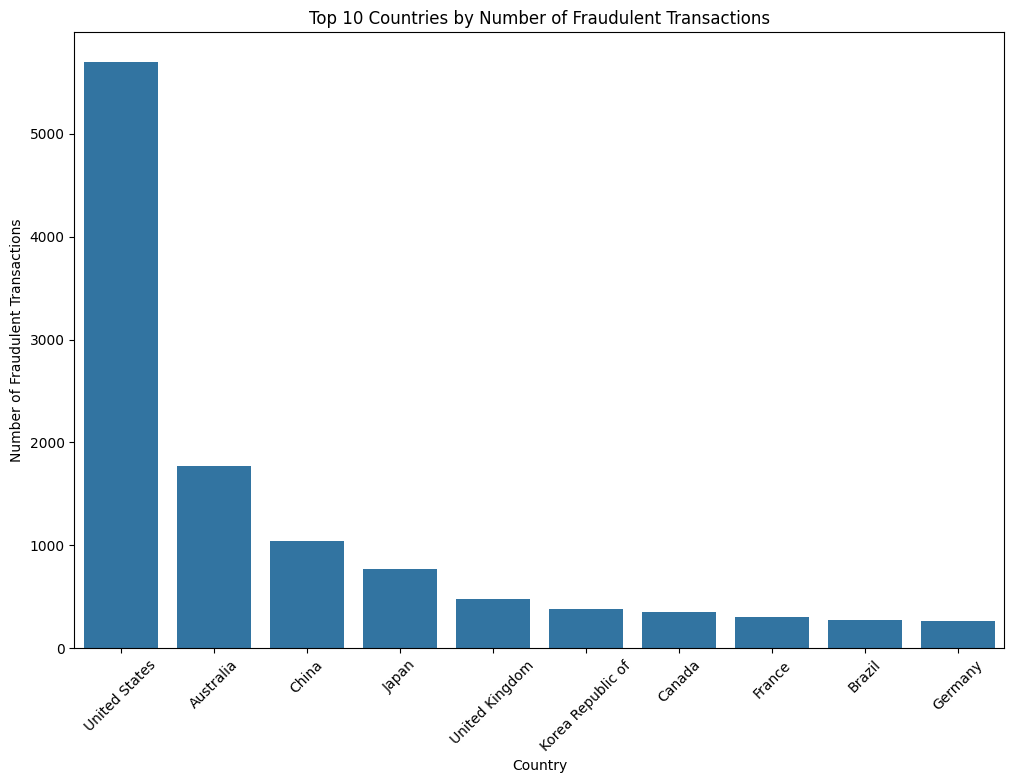

In [170]:
fraud_by_country = df_merged[df_merged['class'] == 1]['country'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=fraud_by_country[:10].index, y=fraud_by_country[:10].values)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Number of Fraudulent Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

In [172]:
df_country_fraud_rate = (fraud_by_country / country_counts).fillna(0) * 100
df_country_fraud_rate = df_country_fraud_rate.sort_values(ascending=False)
print(df_country_fraud_rate)

country
Turkmenistan             100.000000
Namibia                   43.478261
Sri Lanka                 41.935484
Luxembourg                38.888889
Virgin Islands (U.S.)     33.333333
                            ...    
Uganda                     0.000000
Vanuatu                    0.000000
Yemen                      0.000000
Zambia                     0.000000
Zimbabwe                   0.000000
Name: count, Length: 181, dtype: float64


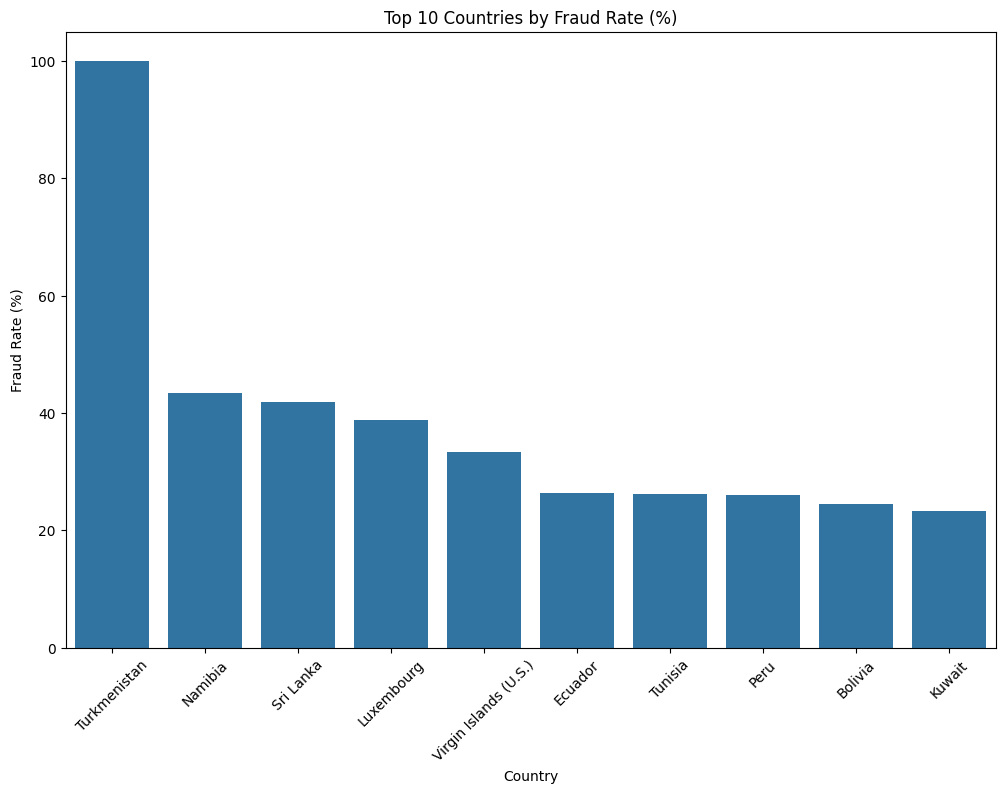

In [173]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_country_fraud_rate[:10].index, y=df_country_fraud_rate[:10].values)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Fraud Rate (%)')
plt.xlabel('Country')
plt.ylabel('Fraud Rate (%)')
plt.show()

Step 9: Save Final Processed Data

In [174]:
save_data(df_merged, '../data/processed_data.csv')
print("\nData Analysis, Feature Engineering, Scaling, and Geographical Analysis Complete. Processed dataset saved as 'processed_data.csv'.")


Data Analysis, Feature Engineering, Scaling, and Geographical Analysis Complete. Processed dataset saved as 'processed_data.csv'.


In [175]:
country_transaction_summary = df_merged.groupby('country').agg(
    transaction_count=('user_id', 'count'),
    total_purchase_value=('purchase_value', 'sum')
).reset_index()

In [176]:
country_transaction_summary = country_transaction_summary.sort_values(by='transaction_count', ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\1850462224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transaction_count', y='country', data=country_transaction_summary.head(10), palette='viridis')


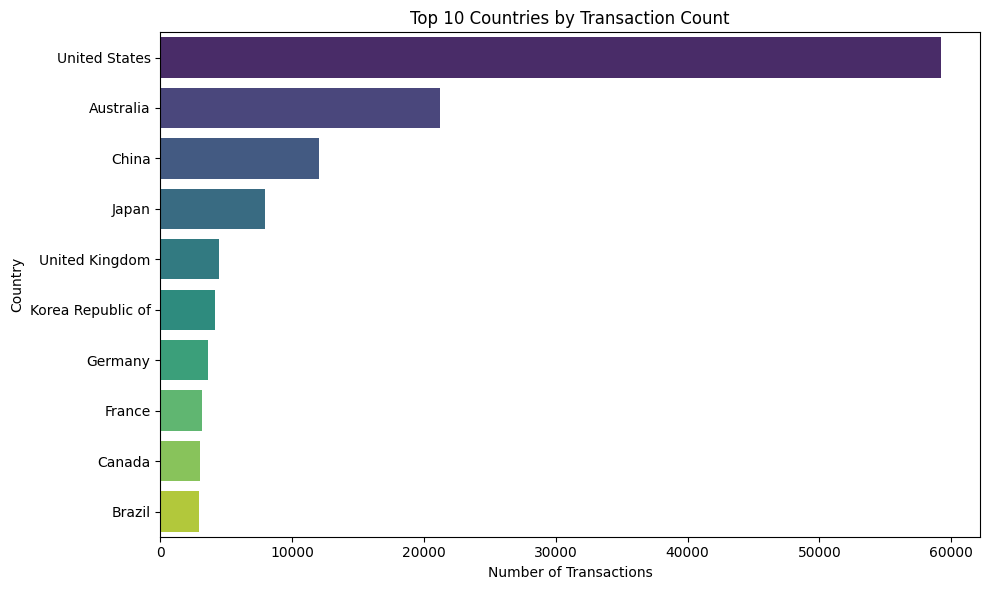

In [177]:
plt.figure(figsize=(10, 6))
sns.barplot(x='transaction_count', y='country', data=country_transaction_summary.head(10), palette='viridis')
plt.title('Top 10 Countries by Transaction Count')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [178]:
hourly_country_data = df_merged.groupby(['country', 'hour_of_day']).size().unstack(fill_value=0)

In [179]:
top_countries = country_transaction_summary['country'].head(10)
hourly_top_countries = hourly_country_data.loc[top_countries]